In [31]:
#Get all packages needed
import pandas as pd
import numpy as np
import datetime
from matplotlib.ticker import FuncFormatter
import matplotlib.pyplot as plt
import warnings
import math as ma
warnings.filterwarnings("ignore")

In [32]:
df = pd.read_excel('KPMG_Updated.xlsx', sheet_name="NewCustomerList")

In [33]:
df

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.94,1.1750,1.46875,1.248437,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.66,0.6600,0.82500,0.701250,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.58,0.5800,0.58000,0.580000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.79,0.9875,0.98750,0.987500,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.57,0.5700,0.71250,0.712500,4,4,1.703125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,Ferdinand,Romanetti,Male,60,1959-10-07,Paralegal,Financial Services,Affluent Customer,N,No,...,NSW,Australia,7,0.81,0.8100,0.81000,0.810000,996,996,0.374000
996,Burk,Wortley,Male,22,2001-10-17,Senior Sales Associate,Health,Mass Customer,N,No,...,NSW,Australia,10,0.54,0.5400,0.67500,0.573750,997,997,0.357000
997,Melloney,Temby,Female,17,1954-10-05,Budget/Accounting Analyst IV,Financial Services,Affluent Customer,N,Yes,...,QLD,Australia,2,0.90,1.1250,1.12500,1.125000,997,997,0.357000
998,Dickie,Cubbini,Male,30,1952-12-17,Financial Advisor,Financial Services,Mass Customer,N,Yes,...,QLD,Australia,2,0.91,1.1375,1.13750,0.966875,997,997,0.357000


In [34]:
def check_NA():
    ret = []
    temp = list(df)
    for each in temp:
        ret.append(df[each].isna().sum())
    return ret

NaNlist = check_NA()
print(NaNlist, len(NaNlist))
# need to check columns
check = []
k     = -1
for i in NaNlist:
    k += 1
    if i > 0:
        check.append(k)
def check_unique():
    temp = list(df)
    mydict = {}
    for i in range(2, 23):
        ct = 0
        if NaNlist[i] > 0:
            ct = len(df[temp[i]].unique()) - 1
        else:
            ct = len(df[temp[i]].unique())
        mydict[temp[i]] = (ct, df[temp[i]].unique())
    return mydict

[0, 29, 0, 0, 17, 106, 165, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0] 23


In [35]:
check_unique()["gender"]

(3, array(['Male', 'Female', 'U'], dtype=object))

[513, 470, 17]


([<matplotlib.axis.XTick at 0x2a9ca4e8448>,
 <a list of 6 Text xticklabel objects>)

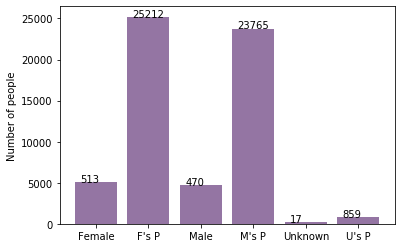

In [36]:
#Analyze the Gender vs Bikes bought
#array(['F', 'Male', 'Female', 'U', 'Femal', 'M'] from KPMG_VI.py
gender = [0,0,0] #first is Female, second if Male, third is Unknown
for each in df['gender']:
    if each[0] == "F":
        gender[0] += 1
    elif each[0] == "M":
        gender[1] += 1
    else:
        gender[2] += 1

print(gender)
def gf(x, pos):
    #'The two args are the value and gender'
    return int(x)

bike = [0,0,0]
df[['past_3_years_bike_related_purchases']] = df[['past_3_years_bike_related_purchases']].apply(pd.to_numeric)
bike[0] += df['past_3_years_bike_related_purchases'][df['gender'] == 'Female'].sum() 
bike[1] += df['past_3_years_bike_related_purchases'][df['gender'] == 'Male'].sum()
bike[2] += df['past_3_years_bike_related_purchases'][df['gender'] == 'U'].sum()

grapho = [gender[0], bike[0], gender[1], bike[1], gender[2], bike[2]]
graphl = [gender[0]*10, bike[0], gender[1]*10, bike[1], gender[2]*10, bike[2]]
colorr = (0.3,0.1,0.4,0.6)
#scale up gender by 10 for easier visualization
formatter = FuncFormatter(gf)
x = np.arange(6)
fig, ax = plt.subplots()
ax.set_ylabel('Number of people')
ax.yaxis.set_major_formatter(formatter)
plt.bar(x, graphl, color = colorr)
for i in range(len(gender*2)):
    plt.text(x = i-0.3, y = graphl[i]+0.1, s = grapho[i], size = 10)

plt.xticks(x, ('Female', "F's P", 'Male', "M's P", 'Unknown', "U's P"))

([<matplotlib.axis.XTick at 0x2a9ca6c8b88>,
 <a list of 3 Text xticklabel objects>)

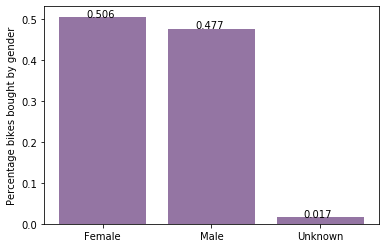

In [37]:
avg  = [0,0,0]
ss   = sum(bike)
for i in range(len(avg)):
    avg[i] += round(bike[i]/ss,3) 

x1 = np.arange(3)
fig1, ax1 = plt.subplots()
ax1.set_ylabel('Percentage bikes bought by gender')
plt.bar(x1, avg, color = colorr)
for i in range(len(avg)):
    plt.text(x = i-0.15, y = avg[i], s = avg[i], size = 10)

plt.xticks(x1, ('Female', 'Male', 'Unknown'))

In [40]:
#Analyze on the age vs bikes bought
#Needs to transform
df["Age"] = 0
lenn = len(df["DOB"])
k    = 0
for i in range(1, lenn):
    #type is date
    if isinstance(df["DOB"][i], datetime.date):
        tl = len(df["DOB"][i].ctime().split(" "))
        print(int(df["DOB"][i].ctime().split(" ")[tl-1]))
        df["Age"][i] += int(2019 - int(df["DOB"][i].time().split(" ")[tl-1]))
    #type is string
    elif isinstance(df["DOB"][i], str):
        tl = len(df["DOB"][i].split("-"))
        df["Age"][i] += int(2019 - int(df["DOB"][i].split("-")[0])) 
    #time is float: means it's nan value so do nothing
#same index as above
ngenage = [0,0,0]
j       = 1
ss      = 0
stdv    = []
for each in df['gender']:
    if each[0] == "F" and df['Age'][j] != 0:
        ss   += df['Age'][j]
        stdv.append((df['Age'][j]))
        ngenage[0] += 1
    elif each[0] == "M" and df['Age'][j] != 0:
        ss += df['Age'][j]
        stdv.append((df['Age'][j]))
        ngenage[1] += 1
    elif df['Age'][j] != 0: 
        ss += df['Age'][j]
        stdv.append((df['Age'][j]))
        ngenage[2] += 1
    j += 1
df

1970


AttributeError: 'datetime.time' object has no attribute 'split'